In [1]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from natsort import index_natsorted
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np

In [2]:
%matplotlib inline
pyo.init_notebook_mode(connected=True)

In [3]:
failed_qc = pd.read_csv("/n/data1/hms/dbmi/baym/arya/projects/project_microtrawler/data/6_checkm2/failed_filter.tsv", sep="\t")
failed_qc

,NCTC_Isolate,Assembly_Sequence,Name,Completeness,Contamination,Completeness_Model_Used,Translation_Table_Used,Coding_Density,Contig_N50,Average_Gene_Length,Genome_Size,GC_Content,Total_Coding_Sequences,Total_Contigs,Max_Contig_Length,Additional_Notes
0,NCTC10005,GCA_900447605,assembly,82.26,4.39,Neural Network (Specific Model),11,0.841,5313651,204.386817,5579270,0.55,7722,5,5313651,None
1,NCTC10006,GCA_900635435,assembly,5.06,0.00,Neural Network (Specific Model),11,0.837,166501,266.411429,166501,0.55,175,1,166501,None
2,NCTC10006,GCA_900635435,assembly_1,21.97,0.11,Neural Network (Specific Model),11,0.869,1497228,253.237377,1497228,0.54,1723,1,1497228,None
3,NCTC10006,GCA_900635435,assembly_10,6.38,0.00,Gradient Boost (General Model),11,0.898,2105,162.000000,2105,0.38,4,1,2105,None
4,NCTC10006,GCA_900635435,assembly_11,2.61,0.00,Neural Network (Specific Model),11,0.845,143273,259.583333,143273,0.55,156,1,143273,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NCTC9435,GCA_900638075,assembly,61.14,4.25,Gradient Boost (General Model),11,0.735,2361607,120.496406,2361607,0.41,4869,1,2361607,None
249,NCTC9601,GCA_900451695,assembly,82.38,5.55,Neural Network (Specific Model),11,0.819,500003,218.531042,5360814,0.57,6749,24,1922599,None
250,NCTC9617,GCA_900452525,assembly,85.61,3.29,Neural Network (Specific Model),11,0.822,3448577,212.030857,5554146,0.57,7227,9,3448577,None
251,NCTC9646,GCA_900707425,assembly,63.87,3.02,Neural Network (Specific Model),11,0.834,7409,206.855560,4061544,0.58,5504,680,68088,None


In [4]:
full_nctcdf = pd.read_csv("../../data/0_databases/nctc_db.csv", sep='\t', index_col=0)
full_nctcdf = full_nctcdf.sort_values(by=["NCTC_Number"], ascending=True, key=lambda x: np.argsort(index_natsorted(full_nctcdf["NCTC_Number"])), ignore_index=True)
full_nctcdf[['Species','Subspecies']] = full_nctcdf['Current_Name'].str.split('subsp.', 1, expand=True)
full_nctcdf = full_nctcdf.replace(np.nan, 'Null', regex=True)
full_nctcdf.drop_duplicates('NCTC_Number').to_excel('./TableS1.xlsx', sheet_name='2022-10-06 Complete NCTC DB')
full_nctcdf.drop_duplicates('NCTC_Number')

,NCTC_Number,Current_Name,Original_Strain_Reference,Type_Strain,Family,Hazard_Group_(ACDP),Release_Restrictions,Isolated_From,Extended_Bibliography,Data,...,Antimicrobial_Resistance_Mechanism,Other_Typing_Information,Special_Growth_Conditions,Comment_on_Organism_Name,Antimicrobial_Susceptibility,Fully_Sequenced_Strain,Year_Cultured,Assembly_Accessions,Species,Subspecies
0,NCTC 1,Shigella flexneri,Cable,No,Enterobacteriaceae,2.0,Terms & Conditions of Supply of Microbial Path...,"Reputed first case of dysentery, Flanders in 1...","$(document).ready(function(){ $(""#nctcbiblio"")...","Andrewes, F. W. & Inman, A. C. (1919) Spec. Re...",...,Null,Null,Null,Null,Null,Null,1914.0,GCA_000953035,Shigella flexneri,Null
1,NCTC 2,Shigella flexneri,Hughes,No,Enterobacteriaceae,2.0,Terms & Conditions of Supply of Microbial Path...,"human, strain from a carrier",Null,"F. W. Andrewes, London in 1920 / Andrewes, F. ...",...,Null,Null,Null,Null,Null,Null,1920.0,GCA_900457135,Shigella flexneri,Null
2,NCTC 3,Shigella flexneri,Oxford Flexner,No,Enterobacteriaceae,2.0,Terms & Conditions of Supply of Microbial Path...,Null,Null,"F. W. Andrewes, London in 1920 / Andrewes, F. ...",...,Null,Null,Null,Null,Null,Null,1919.0,Null,Shigella flexneri,Null
3,NCTC 4,Shigella flexneri,Mountain 2464,No,Enterobacteriaceae,2.0,Terms & Conditions of Supply of Microbial Path...,"human, not recorded",Null,"F. W. Andrewes in 1920 / Andrewes, F. W. & Inm...",...,Null,Null,Null,Null,Null,Null,1919.0,Null,Shigella flexneri,Null
4,NCTC 5,Shigella flexneri,Stansfield,No,Enterobacteriaceae,2.0,Terms & Conditions of Supply of Microbial Path...,Null,Null,"F. W. Andrewes, London in 1920 / Andrewes, F. ...",...,Null,Null,Null,Null,Null,Null,1919.0,GCA_900457205,Shigella flexneri,Null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660,NCTC 14637,Staphylococcus aureus,S2,No,Staphylococcaceae,2.0,Terms & Conditions of Supply of Microbial Path...,Isolation source unknown. UK. Isolated before ...,Null,Homozygous for G2576T mutatuion in all copies ...,...,Null,Null,Null,Null,Null,Null,2021.0,Null,Staphylococcus aureus,Null
5661,NCTC 14638,Enterococcus faecium,L1,No,Enterococcaceae,2.0,Terms & Conditions of Supply of Microbial Path...,Isolation source unknown. UK. Isolated before ...,Null,Homozygous for G2576T mutatuion in all copies ...,...,Null,Null,Null,Null,Null,Null,2021.0,Null,Enterococcus faecium,Null
5662,NCTC 14639,Enterococcus faecalis,L2,No,Enterococcaceae,2.0,Terms & Conditions of Supply of Microbial Path...,Isolation source unknown. United Kingdom. Isol...,Null,Heterozygous for G2576T mutatuion in one copy ...,...,Null,Null,Null,Null,Null,Null,2021.0,Null,Enterococcus faecalis,Null
5663,NCTC 14663,Proteus mirabilis,Null,No,Morganellaceae,2.0,Terms & Conditions of Supply of Microbial Path...,"Human (infection), urine. Norfolk and Norwich ...",Null,"Positive for blaOXA-23 carbapenmase gene, alth...",...,Null,Null,Null,Null,Null,Null,2021.0,Null,Proteus mirabilis,Null


In [5]:
genomeandyear_nctcdf = full_nctcdf.drop_duplicates("NCTC_Number").loc[(full_nctcdf['Year_Cultured']!=-1) & (full_nctcdf['Assembly_Accessions']!='Null')].copy()
# genomeandyear_nctcdf.drop_duplicates('NCTC_Number').to_excel('./TableS2.xlsx', sheet_name='2022-10-06 Complete NCTC DB')
genomeandyear_nctcdf.drop_duplicates('NCTC_Number')

,NCTC_Number,Current_Name,Original_Strain_Reference,Type_Strain,Family,Hazard_Group_(ACDP),Release_Restrictions,Isolated_From,Extended_Bibliography,Data,...,Antimicrobial_Resistance_Mechanism,Other_Typing_Information,Special_Growth_Conditions,Comment_on_Organism_Name,Antimicrobial_Susceptibility,Fully_Sequenced_Strain,Year_Cultured,Assembly_Accessions,Species,Subspecies
0,NCTC 1,Shigella flexneri,Cable,No,Enterobacteriaceae,2.0,Terms & Conditions of Supply of Microbial Path...,"Reputed first case of dysentery, Flanders in 1...","$(document).ready(function(){ $(""#nctcbiblio"")...","Andrewes, F. W. & Inman, A. C. (1919) Spec. Re...",...,Null,Null,Null,Null,Null,Null,1914.0,GCA_000953035,Shigella flexneri,Null
1,NCTC 2,Shigella flexneri,Hughes,No,Enterobacteriaceae,2.0,Terms & Conditions of Supply of Microbial Path...,"human, strain from a carrier",Null,"F. W. Andrewes, London in 1920 / Andrewes, F. ...",...,Null,Null,Null,Null,Null,Null,1920.0,GCA_900457135,Shigella flexneri,Null
4,NCTC 5,Shigella flexneri,Stansfield,No,Enterobacteriaceae,2.0,Terms & Conditions of Supply of Microbial Path...,Null,Null,"F. W. Andrewes, London in 1920 / Andrewes, F. ...",...,Null,Null,Null,Null,Null,Null,1919.0,GCA_900457205,Shigella flexneri,Null
8,NCTC 30,Vibrio cholerae non 0:1,Martin I,No,Vibrionaceae,2.0,Terms & Conditions of Supply of Microbial Path...,"human, human faeces",Null,"(ATCC 14735) Lister Institute, London in 1920 ...",...,Null,Null,Null,Null,Null,Null,1916.0,GCA_900538065,Vibrio cholerae non 0:1,Null
9,NCTC 60,Proteus mirabilis,Pneum,No,Enterobacteriaceae,2.0,Terms & Conditions of Supply of Microbial Path...,"human, case of pneumaturia in amsterdam",Null,"J. J. van Loghem, Amsterdam in 1920 / Redeposi...",...,Null,Null,Null,Null,Null,Null,1935.0,GCA_900455025,Proteus mirabilis,Null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5289,NCTC 13923,Enterococcus faecium,Null,No,Enterococcaceae,2.0,Terms & Conditions of Supply of Microbial Path...,"Human (inpatient), urine. Sligo, Ireland. June...",Null,Antimicrobial resistant strain encoding the li...,...,Null,Null,Null,Null,Null,Null,2013.0,GCA_900447875,Enterococcus faecium,Null
5290,NCTC 13924,Staphylococcus epidermidis,NCTC 13924,No,Staphylococcaceae,2.0,Terms & Conditions of Supply of Microbial Path...,"Clinical isolate. Human, blood culture. Saint-...",Null,Linezolid resistant strain encoding cfr gene a...,...,Null,Null,Null,Null,Null,Null,2013.0,GCA_900638695,Staphylococcus epidermidis,Null
5297,NCTC 13936,Listeria booriae,FSL A5-0281,Yes,Listeriaceae,2.0,Terms & Conditions of Supply of Microbial Path...,Non-food contact surface in a dairy processing...,Null,Null,...,Null,Null,Null,Null,Null,Null,2015.0,GCA_900453065,Listeria booriae,Null
5301,NCTC 13940,Listeria fleischmannii subsp. fleischmannii,Null,Yes,Listeriaceae,2.0,Terms & Conditions of Supply of Microbial Path...,Hard Cheese in Western Switzerland in 2006.,"$(document).ready(function(){ $(""#nctcbiblio"")...",Null,...,Null,Null,Null,Null,Null,Null,2006.0,GCA_900453385,Listeria fleischmannii,fleischmannii


In [6]:
genomeandyear_nctcdf = genomeandyear_nctcdf[~genomeandyear_nctcdf['NCTC_Number'].str.replace(' ', '').isin(failed_qc['NCTC_Isolate'])]
print(genomeandyear_nctcdf.drop_duplicates('NCTC_Number').shape)
genomeandyear_nctcdf.drop_duplicates('NCTC_Number').to_excel('./TableS2.xlsx', sheet_name='Isolates Used')

(1817, 44)


In [7]:
family_name = genomeandyear_nctcdf['Species'].str.split(' ', expand=True)[0].str[0]
species_name = genomeandyear_nctcdf['Species'].str.split(' ', expand=True)[1]
genomeandyear_nctcdf['Specie_Name'] = family_name + ". " + species_name
specie_counts = genomeandyear_nctcdf['Specie_Name'].value_counts()
topx = specie_counts.head(5).index.tolist()
genomeandyear_nctcdf['TopSpecies'] = genomeandyear_nctcdf['Specie_Name']
genomeandyear_nctcdf.loc[~genomeandyear_nctcdf['TopSpecies'].isin(topx), ['TopSpecies']] = 'Other'
topx.insert(0, 'Other')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


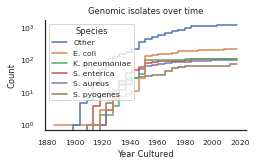

In [17]:
sns.set_theme(font='Arial', style='white', font_scale=0.7)
#sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5})   
#sns.set_palette("deep")
histogram = sns.histplot(
    data=genomeandyear_nctcdf,
    x='Year_Cultured',
    hue='TopSpecies',
    # multiple="stack",
    hue_order=topx,
    cumulative=True,
    fill=False,
    element="step",
    # legend="full",
)
# histogram.set(yscale='log')
histogram.set(xlabel='Year Cultured', title='Genomic isolates over time')
histogram.set_yscale('log')
sns.despine()
legend = histogram.get_legend()
handles = legend.legendHandles
legend.remove()
histogram.legend(handles, topx, title="Species")
# histogram._legend.set_title('Species')
figure = plt.gcf() # get current figure
figure.set_size_inches(3.61, 2.03)
plt.savefig('./figs/fig1/year_cultured-hist.svg', dpi=300, transparent=True, bbox_inches='tight')

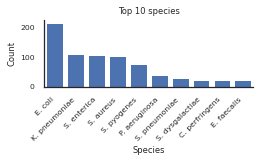

In [19]:
species_counts = genomeandyear_nctcdf['Species'].value_counts().reset_index()
species_counts = species_counts.rename(columns={'index': 'Species', 'Species': 'Count'})
family_name = species_counts['Species'].str.split(' ', expand=True)[0].str[0]
species_name = species_counts['Species'].str.split(' ', expand=True)[1]
species_counts['Species'] = family_name + ". " + species_name
merged_species_counts = species_counts.groupby('Species').sum().sort_values('Count', ascending=False).reset_index()
sns.set_theme(font='Arial', style='white', font_scale=0.7)
barplot = sns.barplot(data=merged_species_counts.head(10), 
            x='Species', 
            y='Count',
            # facecolor="#7995C4",
            facecolor=sns.color_palette("deep")[0]
           )
barplot.set(title='Top 10 species')
sns.despine()
figure = plt.gcf() # get current figure
figure.set_size_inches(3.67, 2.3085)
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='both', which='major')#, labelsize=12)
plt.tight_layout()
plt.savefig('./figs/fig1/species_dist-bar.svg', dpi=300, bbox_inches='tight', transparent=False)

In [14]:
accession_speciesdf = genomeandyear_nctcdf[['NCTC_Number', 'Specie_Name']].copy()
accession_speciesdf['NCTC_Number'] = accession_speciesdf['NCTC_Number'].str.replace(' ', '')
accession_speciesdf.drop_duplicates().to_csv(
    "../../nctc_accessions.tsv", header=False, index=False, sep="\t"
)

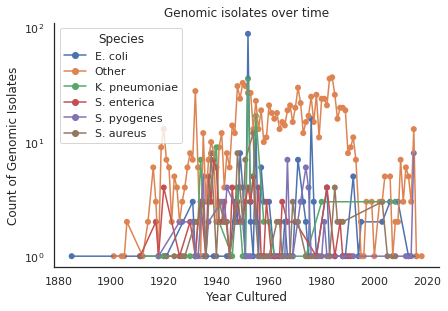

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume you have a DataFrame: genomeandyear_nctcdf
# with columns "Year_Cultured" and "TopSpecies"
# similar to how you had before.

sns.set_theme(style="white", font="Arial")

# Aggregate the data by year and species
aggregated_data = (
    genomeandyear_nctcdf
    .groupby(["Year_Cultured", "TopSpecies"])
    .size()
    .reset_index(name="count")
)

# Extract the unique species and assign colors
species = aggregated_data["TopSpecies"].unique()
palette = sns.color_palette("deep", n_colors=len(species))
species_color_map = dict(zip(species, palette))

plt.figure(figsize=(6.9, 4.5))

# Plot a line and scatter for each species
for sp in species:
    subset = aggregated_data[aggregated_data["TopSpecies"] == sp].sort_values("Year_Cultured")
    plt.plot(subset["Year_Cultured"], subset["count"], label=sp, color=species_color_map[sp])
    plt.scatter(subset["Year_Cultured"], subset["count"], color=species_color_map[sp], edgecolor="none")

# Set log scale on y-axis
plt.yscale('log')

# Despine and set labels
sns.despine()
plt.xlabel("Year Cultured")
plt.ylabel("Count of Genomic Isolates")
plt.title("Genomic isolates over time")

# Create legend elements manually (optional, if you want custom styling)
legend_elements = [
    plt.Line2D([0], [0], color=species_color_map[sp], marker='o', label=sp, linestyle='-')
    for sp in species
]

plt.legend(handles=legend_elements, title="Species", loc="best")

# Save figure if desired
plt.savefig('./figs/fig1/year_cultured-line_scatter.svg', dpi=300, transparent=True, bbox_inches='tight')

plt.show()

/tmp/ipykernel_23074/2057698737.py:20: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['TopSpecies'], dtype='object')



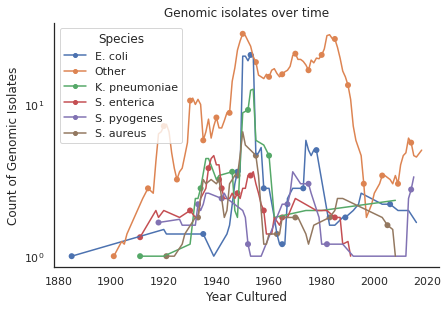

In [16]:

sns.set_theme(style="white", font="Arial", font_scale=1)

# Aggregate the data
aggregated_data = (
    genomeandyear_nctcdf
    .groupby(["Year_Cultured", "TopSpecies"])
    .size()
    .reset_index(name="count")
    .sort_values("Year_Cultured")
)

species = aggregated_data["TopSpecies"].unique()
palette = sns.color_palette("deep", n_colors=len(species))
species_color_map = dict(zip(species, palette))

# Apply rolling mean smoothing with a window size of 3 years
smoothed_data = (
    aggregated_data
    .groupby("TopSpecies")
    .apply(lambda g: g.set_index("Year_Cultured").rolling(window=5, min_periods=1, center=True).mean())
    .reset_index()
    .dropna(subset=["count"])  # optional if you want to drop partial windows
)

plt.figure(figsize=(6.9, 4.5))

for sp in species:
    subset = smoothed_data[smoothed_data["TopSpecies"] == sp].sort_values("Year_Cultured")
    # Plot the smoothed line
    plt.plot(subset["Year_Cultured"], subset["count"], label=sp, color=species_color_map[sp])
    # Plot a reduced number of markers
    plt.scatter(subset["Year_Cultured"][::5], subset["count"][::5], color=species_color_map[sp], edgecolor="none")

plt.yscale('log')
sns.despine()
plt.xlabel("Year Cultured")
plt.ylabel("Count of Genomic Isolates")
plt.title("Genomic isolates over time")

# Custom legend
legend_elements = [
    plt.Line2D([0], [0], color=species_color_map[sp], marker='o', markersize=4, label=sp, linestyle='-')
    for sp in species
]
plt.legend(handles=legend_elements, title="Species", loc="best")

plt.savefig('./figs/fig1/year_cultured-line_scatter_smoothed.svg', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

/tmp/ipykernel_23074/3038742628.py:24: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['TopSpecies'], dtype='object')



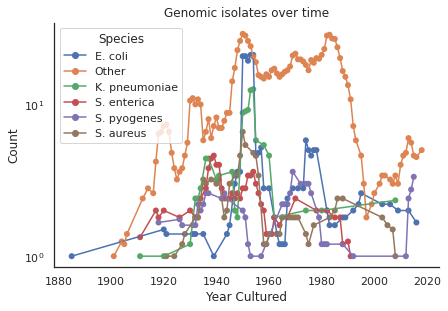

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white", font="Arial")

# Aggregate the data
aggregated_data = (
    genomeandyear_nctcdf
    .groupby(["Year_Cultured", "TopSpecies"])
    .size()
    .reset_index(name="count")
    .sort_values("Year_Cultured")
)

species = aggregated_data["TopSpecies"].unique()
palette = sns.color_palette("deep", n_colors=len(species))
species_color_map = dict(zip(species, palette))

# Apply rolling mean smoothing with a window size of 3 years
smoothed_data = (
    aggregated_data
    .groupby("TopSpecies")
    .apply(lambda g: g.set_index("Year_Cultured").rolling(window=5, min_periods=1, center=True).mean())
    .reset_index()
    .dropna(subset=["count"], how='any')  # optional if you want to drop partial windows
)

plt.figure(figsize=(6.9, 4.5))

for sp in species:
    subset = smoothed_data[smoothed_data["TopSpecies"] == sp].sort_values("Year_Cultured")
    # Plot the smoothed line
    plt.plot(subset["Year_Cultured"], subset["count"], label=sp, color=species_color_map[sp])
    # Plot markers for all data points
    plt.scatter(subset["Year_Cultured"], subset["count"], color=species_color_map[sp], edgecolor="none")

plt.yscale('log')
sns.despine()
plt.xlabel("Year Cultured")
plt.ylabel("Count")
plt.title("Genomic isolates over time")

# Custom legend
legend_elements = [
    plt.Line2D([0], [0], color=species_color_map[sp], marker='o', label=sp, linestyle='-')
    for sp in species
]
plt.legend(handles=legend_elements, title="Species", loc="best")

plt.savefig('./figs/fig1/year_cultured-line_scatter_smoothed_allmarkers.svg', dpi=300, transparent=True, bbox_inches='tight')
plt.show()


In [24]:
genomeandyear_nctcdf[['NCTC_Number', 'Year_Cultured']].sort_values(by="Year_Cultured")

,NCTC_Number,Year_Cultured
13,NCTC 86,1885.0
2554,NCTC 10337,1901.0
2555,NCTC 10338,1904.0
643,NCTC 6355,1905.0
26,NCTC 232,1906.0
...,...,...
5201,NCTC 13800,2015.0
5147,NCTC 13745,2015.0
5285,NCTC 13919,2016.0
4959,NCTC 13484,2016.0
